In [1]:
import numpy
import cv2
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread('labka (1).jpg')

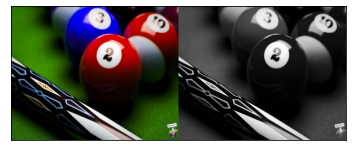

In [3]:
def changeQuantisationGrey(image: numpy.ndarray, num_bits: int):
    convImage = image.copy()
    if num_bits >= 1 and num_bits <= 8:
        height, width, channels = image.shape
        mask = 0xFF << (8 - num_bits)
        for i in range(height):
            for j in range(width):
                convImage[i,j] = numpy.clip(0.299*image[i,j][2] + 0.587*image[i,j][1] +  0.114*image[i,j][0], 0, 255)
                convImage[i,j] = convImage[i,j] & mask
    plt.imshow(numpy.hstack([ image, convImage ]))
    plt.xticks([]), plt.yticks([])
    plt.show()

changeQuantisationGrey(image, 8)

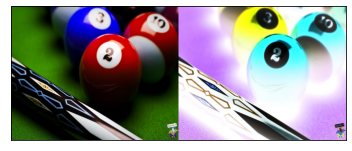

In [4]:
def cmy(image: numpy.ndarray):
    convImage = image.copy()
    height, width, channels = image.shape
    for i in range(height):
        for j in range(width):
            convImage[i,j] = 255-image[i,j]
    plt.imshow(numpy.hstack([ image, convImage ]))
    plt.xticks([]), plt.yticks([])
    plt.show()

cmy(image)

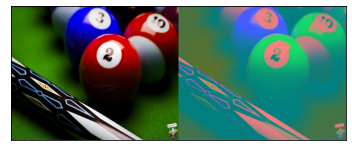

In [5]:
def yuv(image: numpy.ndarray):
    convImage = image.copy()
    height, width, channels = image.shape
    for i in range(height):
        for j in range(width):
            Y = numpy.clip(0.299*image[i,j][2] + 0.587*image[i,j][1] +  0.114*image[i,j][0], 0, 255)
            convImage[i,j][0] = Y
            convImage[i,j][1] = numpy.clip(0.492*(image[i,j][0] - Y) + 128, 0, 255) # U
            convImage[i,j][2] = numpy.clip(0.877*(image[i,j][2] - Y) + 128, 0, 255) # V
    plt.imshow(numpy.hstack([ image, convImage ]))
    plt.xticks([]), plt.yticks([])
    plt.show()

yuv(image)

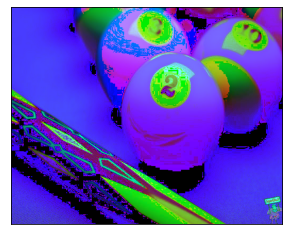

In [6]:
def hls(image: numpy.ndarray):
    convImage = image.copy()
    height, width, channels = image.shape
    plt.imshow(image)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2HLS))
    plt.xticks([]), plt.yticks([])
    plt.show()

hls(image)

In [7]:
def add_salt_and_pepper_noise(img, noise_amount=0.1):
    noise_image = img.copy()
    noise_points = int(noise_image.size * noise_amount)
    for n in range(noise_points):
        pixel = tuple(numpy.random.randint(noise_image.shape))
        noise_image[pixel] = 255 if numpy.random.randint(256) % 2 == 1 else 0
    return noise_image
def add_gaussian_noise(image_in: numpy.ndarray, noise_sigma=0.5):
    height, width, channels = image_in.shape
    noise_image = \
        numpy.random.normal(0, noise_sigma, image_in.size). \
        reshape(height, width, channels).astype('uint8')
    noise_image = cv2.addWeighted(image_in, 1., noise_image, 1., 0.)
    return noise_image

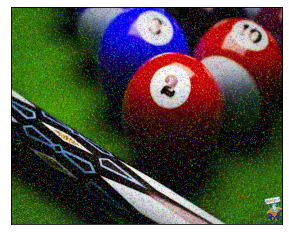

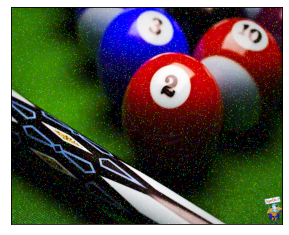

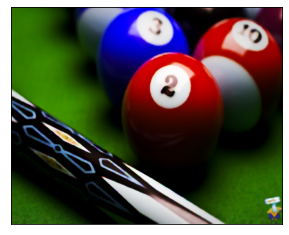

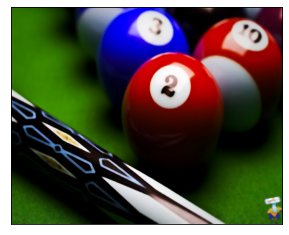

In [8]:
salt_and_pepper_noise_image = add_salt_and_pepper_noise(image)
plt.imshow(salt_and_pepper_noise_image)
plt.xticks([]), plt.yticks([])
plt.show()
gaussian_noise_image = add_gaussian_noise(image)
plt.imshow(gaussian_noise_image)
plt.xticks([]), plt.yticks([])
plt.show()
median = cv2.medianBlur(salt_and_pepper_noise_image, 5)
plt.imshow(median)
plt.xticks([]), plt.yticks([])
plt.show()
median = cv2.medianBlur(gaussian_noise_image, 5)
plt.imshow(median)
plt.xticks([]), plt.yticks([])
plt.show()